In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reading data
df = pd.read_excel('./data/recycle_waste.xlsx')

# Rename the Unnamed: 0 column to Countries
df.rename(columns={'Unnamed: 0': 'Countries'}, inplace=True)

# Creating a list with Unnamed columns
remove_cols = [col for col in df.columns if 'Unnamed' in col]

# Removing the Unnamed columns
df.drop(remove_cols, axis='columns', inplace=True)

# Replacing ":" with NaN value
df = df.replace(':', np.nan)

dtypes_dict = {
    'Countries': 'category', 
    '2004': 'float',
    '2006': 'float',
    '2008': 'float',
    '2010': 'float',
    '2012': 'float',
    '2014': 'float',
    '2016': 'float',
    '2018': 'float',
    '2020': 'float',
}

df = df.astype(dtypes_dict)

# Setting the countries name as the index
df.set_index('Countries', inplace=True)

# Keeping only the countries that we are comparing 
df = df.loc[['Ireland','Netherlands', 'Sweden', 'France', 'Denmark']]

print(df)

                    2004         2006         2008         2010         2012  \
Countries                                                                      
Ireland       11617843.0   15462353.0   10415485.0    3356440.0    2811788.0   
Netherlands   57142955.0   61770469.0   66692585.0   57964213.0   59880430.0   
Sweden        13065467.0   15199944.0    9817659.0   16587093.0   19506447.0   
France       174161057.0  175796985.0  194549002.0  200677448.0  191314823.0   
Denmark        8761855.0   10787222.0   10282534.0    7778942.0    7705564.0   

                    2014         2016         2018         2020  
Countries                                                        
Ireland        4999172.0    6677532.0    7705389.0          NaN  
Netherlands   59257658.0   63770231.0   63157367.0   60225123.0  
Sweden        17711585.0   23188834.0   20832930.0   21144320.0  
France       192494192.0  199331337.0  215398124.0  188431526.0  
Denmark       10347151.0    9791108.0   137

In [2]:
# Filling Nan values with the mean and changing the dataset so it looks more like a timeseries dataset
df = df.iloc[:, :].T.fillna(df.iloc[:, :].mean(axis='columns')).T
df_1 = df.T

# Creating a column name 'Time' for predicting steps
df_1['Time'] = np.arange(len(df_1.index))

print(df_1)

Countries      Ireland  Netherlands      Sweden       France     Denmark  Time
2004       11617843.00   57142955.0  13065467.0  174161057.0   8761855.0     0
2006       15462353.00   61770469.0  15199944.0  175796985.0  10787222.0     1
2008       10415485.00   66692585.0   9817659.0  194549002.0  10282534.0     2
2010        3356440.00   57964213.0  16587093.0  200677448.0   7778942.0     3
2012        2811788.00   59880430.0  19506447.0  191314823.0   7705564.0     4
2014        4999172.00   59257658.0  17711585.0  192494192.0  10347151.0     5
2016        6677532.00   63770231.0  23188834.0  199331337.0   9791108.0     6
2018        7705389.00   63157367.0  20832930.0  215398124.0  13757285.0     7
2020        7880750.25   60225123.0  21144320.0  188431526.0  12532418.0     8


In [3]:
# Training data
#---------------

# Selecting time as the feature to train the model
X = df_1.loc[:, ['Time']]  # features

# Creating a copy of X and adding the steps to predict until 2030
X_2 = X.copy()
X_2.loc['2022'] = 9
X_2.loc['2024'] = 10
X_2.loc['2026'] = 11
X_2.loc['2028'] = 12
X_2.loc['2030'] = 13

# Selecting the target for prediction
y_Ireland = df_1.loc[:, 'Ireland'] 
y_Netherlands = df_1.loc[:, 'Netherlands']
y_Sweden = df_1.loc[:, 'Sweden']
y_France = df_1.loc[:, 'France']
y_Denmark = df_1.loc[:, 'Denmark']

X_train_Ireland, X_test_Ireland, y_train_Ireland, y_test_Ireland = train_test_split(X, y_Ireland, test_size=0.20, random_state=1)
X_train_Netherlands, X_test_Netherlands, y_train_Netherlands, y_test_Netherlands = train_test_split(X, y_Netherlands, test_size=0.20, random_state=1)
X_train_Sweden, X_test_Sweden, y_train_Sweden, y_test_Sweden = train_test_split(X, y_Sweden, test_size=0.20, random_state=1)
X_train_France, X_test_France, y_train_France, y_test_France = train_test_split(X, y_France, test_size=0.20, random_state=1)
X_train_Denmark, X_test_Denmark, y_train_Denmark, y_test_Denmark = train_test_split(X, y_Denmark, test_size=0.20, random_state=1)

# Train the model
model_Ireland = LinearRegression()
model_Ireland.fit(X_train_Ireland, y_train_Ireland)

model_Netherlands = LinearRegression()
model_Netherlands.fit(X_train_Netherlands, y_train_Netherlands)

model_Sweden = LinearRegression()
model_Sweden.fit(X_train_Sweden, y_train_Sweden)

model_France = LinearRegression()
model_France.fit(X_train_France, y_train_France)

model_Denmark = LinearRegression()
model_Denmark.fit(X_train_Denmark, y_train_Denmark)

# Predicting until 2030
y_Ireland_pred = pd.Series(model_Ireland.predict(X_2), index=X_2.index)

y_Netherlands_pred = pd.Series(model_Netherlands.predict(X_2), index=X_2.index)

y_Sweden_pred = pd.Series(model_Sweden.predict(X_2), index=X_2.index)

y_France_pred = pd.Series(model_France.predict(X_2), index=X_2.index)

y_Denmark_pred = pd.Series(model_Denmark.predict(X_2), index=X_2.index)

In [4]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

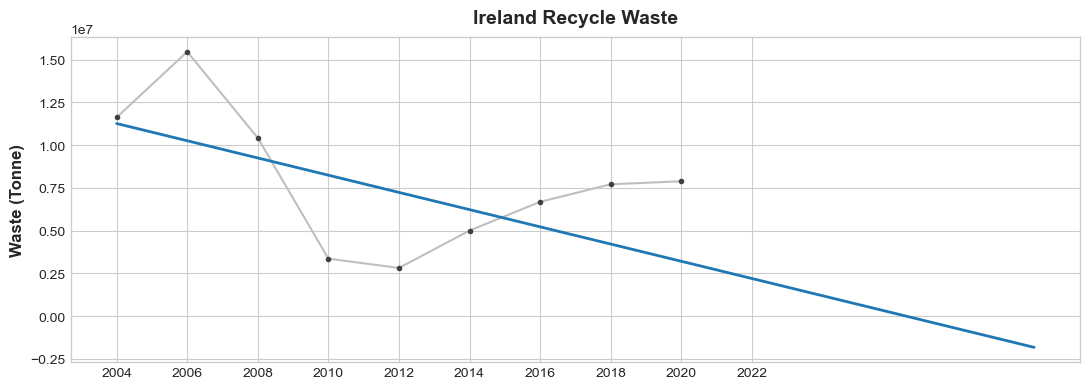

In [5]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Ireland.plot(**plot_params)
ax = y_Ireland_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Ireland Recycle Waste');

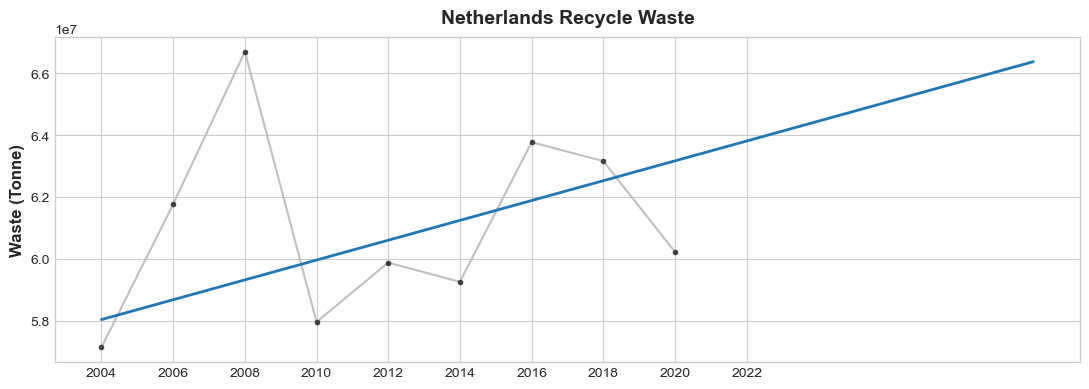

In [6]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Netherlands.plot(**plot_params)
ax = y_Netherlands_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Netherlands Recycle Waste');

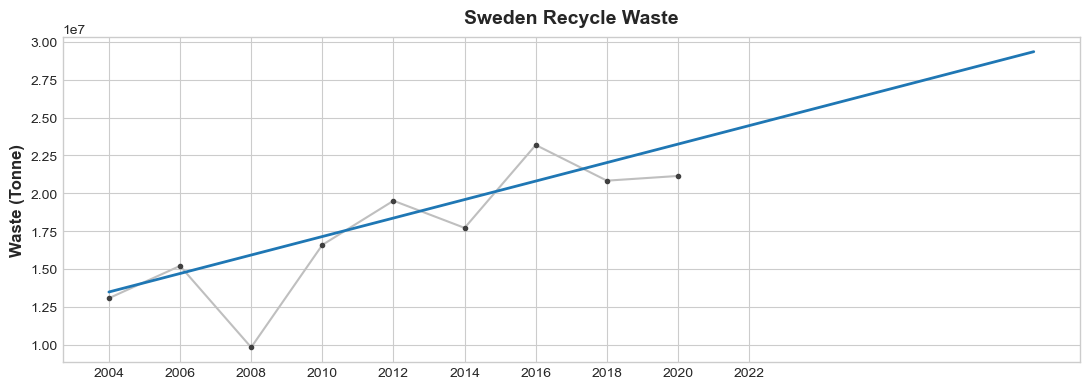

In [7]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Sweden.plot(**plot_params)
ax = y_Sweden_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Sweden Recycle Waste');

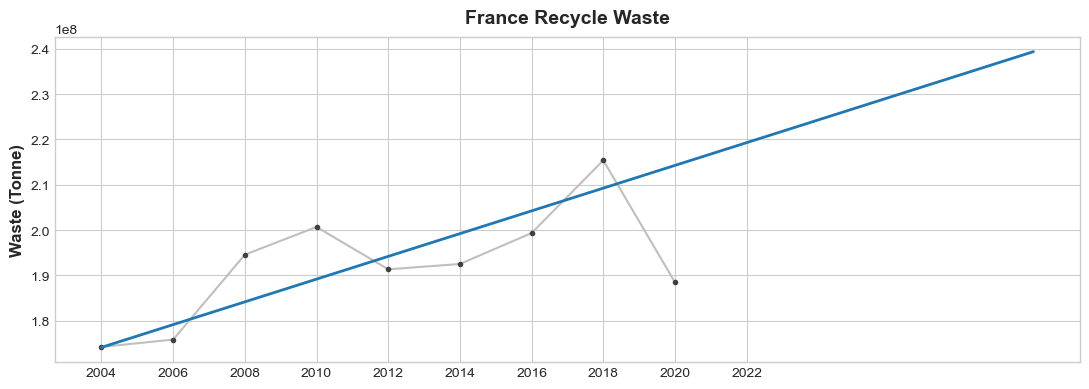

In [8]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_France.plot(**plot_params)
ax = y_France_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('France Recycle Waste');

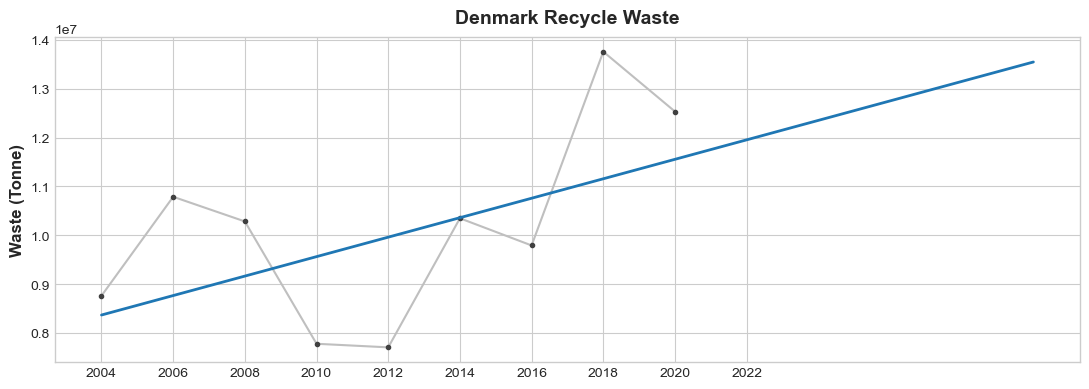

In [9]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Denmark.plot(**plot_params)
ax = y_Denmark_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Denmark Recycle Waste');

In [10]:
# Creating a list for each country with the predicted values
waste_Ireland = [df_1.loc['2010', 'Ireland'], df_1.loc['2020', 'Ireland'], y_Ireland_pred.values[13]]
waste_Netherlands = [df_1.loc['2010', 'Netherlands'], df_1.loc['2020', 'Netherlands'], y_Netherlands_pred.values[13]]
waste_Sweden = [df_1.loc['2010', 'Sweden'], df_1.loc['2020', 'Sweden'], y_Sweden_pred.values[13]]
waste_France = [df_1.loc['2010', 'France'], df_1.loc['2020', 'France'], y_France_pred.values[13]]
waste_Denmark = [df_1.loc['2010', 'Denmark'], df_1.loc['2020', 'Denmark'], y_Denmark_pred.values[13]]

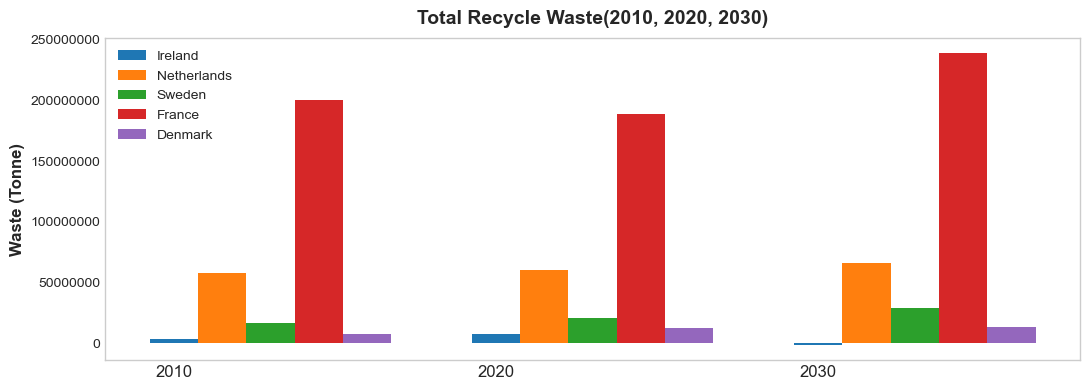

In [11]:
# Plotting the comparision of the years 2010, 2020 and 2030 of every country
width =0.15
labels = ['2010', '2020', '2030']
plt.bar(np.arange(len(waste_Ireland)), waste_Ireland, width=width)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.bar(np.arange(len(waste_Netherlands))+ width, waste_Netherlands, width=width)
plt.bar(np.arange(len(waste_Sweden))+ (2*width), waste_Sweden, width=width)
plt.bar(np.arange(len(waste_France))+ (3*width), waste_France, width=width)
plt.bar(np.arange(len(waste_Denmark))+ (4*width), waste_Denmark, width=width)
plt.xticks(range(len(waste_Sweden)), labels, fontsize=12)
plt.ylabel('Waste (Tonne)', fontsize=12)
plt.legend(labels=['Ireland', 'Netherlands', 'Sweden', 'France', 'Denmark'], loc='upper left')
plt.title("Total Recycle Waste(2010, 2020, 2030)")
plt.grid(False)
plt.show()

In [12]:
# Passing the data to a JSON file for the dashboard
Ireland = y_Ireland_pred.reset_index()
Ireland.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
Netherlands = y_Netherlands_pred.reset_index()
Netherlands.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
Sweden = y_Sweden_pred.reset_index()
Sweden.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
France = y_France_pred.reset_index()
France.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
Denmark = y_Denmark_pred.reset_index()
Denmark.rename(columns={"index": "Date", 0: "pred"}, inplace=True)

predictions = {'Date': Ireland['Date'],
               'Ireland': Ireland['pred'],
               'Netherlands': Netherlands['pred'],
               'Sweden': Sweden['pred'],
               'France': France['pred'],
               'Denmark': Denmark['pred'],
              }

pred_df = pd.DataFrame(data=predictions)
pred_df.drop(pred_df.index[0:9], inplace=True)
df_2 = df_1.drop('Time', axis=1)
df_2 = df_2.reset_index()
df_2.rename(columns={"index": "Date"}, inplace=True)
predictions_df = pd.concat([df_2, pred_df], ignore_index=False)
predictions_df.iloc[:, 1:] = predictions_df.iloc[:, 1:].apply(np.ceil)
predictions_df.to_json('DA_Recycle.json', orient = "records", lines=True)

In [13]:
# Metrics Evaluation

# Linear Regression

# Train RMSE
y_pred_Ireland = model_Ireland.predict(X_train_Ireland)
print(f"RMSE Ireland: {np.sqrt(mean_squared_error(y_train_Ireland, y_pred_Ireland))}")

y_pred_Netherlands = model_Netherlands.predict(X_train_Netherlands)
print(f"RMSE Netherlands: {np.sqrt(mean_squared_error(y_train_Netherlands, y_pred_Netherlands))}")

y_pred_Sweden = model_Sweden.predict(X_train_Sweden)
print(f"RMSE Sweden: {np.sqrt(mean_squared_error(y_train_Sweden, y_pred_Sweden))}")

y_pred_France = model_France.predict(X_train_France)
print(f"RMSE France: {np.sqrt(mean_squared_error(y_train_France, y_pred_France))}")

y_pred_Denmark = model_Denmark.predict(X_train_Denmark)
print(f"RMSE Denmark: {np.sqrt(mean_squared_error(y_train_Denmark, y_pred_Denmark))}")

# TRAIN Rsquared
print(f"\nTrain Rsquared Ireland: {model_Ireland.score(X_train_Ireland, y_train_Ireland)}")

print(f"Train Rsquared Netherlands: {model_Netherlands.score(X_train_Netherlands, y_train_Netherlands)}")

print(f"Train Rsquared Sweden: {model_Sweden.score(X_train_Sweden, y_train_Sweden)}")

print(f"Train Rsquared France: {model_France.score(X_train_France, y_train_France)}")

print(f"Train Rsquared Denmark: {model_Denmark.score(X_train_Denmark, y_train_Denmark)}")

# Test RMSE
y_pred_test_Ireland = model_Ireland.predict(X)
print(f"\nTest RMSE Ireland: {np.sqrt(mean_squared_error(y_Ireland, y_pred_test_Ireland))}")

y_pred_test_Netherlands = model_Netherlands.predict(X)
print(f"Test RMSE Netherlands: {np.sqrt(mean_squared_error(y_Netherlands, y_pred_test_Netherlands))}")

y_pred_test_Sweden = model_Sweden.predict(X)
print(f"Test RMSE Sweden: {np.sqrt(mean_squared_error(y_Sweden, y_pred_test_Sweden))}")

y_pred_test_France = model_France.predict(X)
print(f"Test RMSE France: {np.sqrt(mean_squared_error(y_France, y_pred_test_France))}")

y_pred_test_Denmark = model_Denmark.predict(X)
print(f"Test RMSE Denmark: {np.sqrt(mean_squared_error(y_Denmark, y_pred_test_Denmark))}")

RMSE Ireland: 3515002.760132273
RMSE Netherlands: 1803386.700447548
RMSE Sweden: 1344212.1770398282
RMSE France: 6079182.362240076
RMSE Denmark: 1699178.6041828552

Train Rsquared Ireland: 0.31617253921813493
Train Rsquared Netherlands: 0.4155680219526844
Train Rsquared Sweden: 0.8230680914428554
Train Rsquared France: 0.7937325715457194
Train Rsquared Denmark: 0.23641268831655837

Test RMSE Ireland: 3491915.8280298
Test RMSE Netherlands: 3086567.2419235534
Test RMSE Sweden: 2456351.379558094
Test RMSE France: 10724630.830850946
Test RMSE Denmark: 1578255.911171178
